In [17]:
from keras import layers,models,regularizers

In [18]:
import pandas as pd

In [20]:
data = pd.read_csv("start_end_prediction.csv")

In [22]:
data.head(5)
data.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
data.head(5)

,tool,r_c_p,batch_seq,lot_end-lot_start
0,0,68,1048,3886
1,0,34,1370,4561
2,0,34,176,3108
3,0,29,282,3971
4,0,37,585,4629


In [23]:
import numpy as np
x, y = np.split(data.values, (3,), axis=1)

In [40]:
#这些离散特征值都是id，即代号，没有实际意义，不做数据标准化
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(x, y, test_size=0.3)
print(train_data,train_label)

[[   2   34  238]
 [   4   39  895]
 [   3   45 2944]
 ...
 [   4   58 2397]
 [   3   33 2827]
 [   1   29 1000]] [[2527]
 [2342]
 [2835]
 ...
 [1799]
 [2958]
 [3960]]


In [42]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(54,activation='relu',input_shape=(train_data.shape[1],),kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model
#下面k=10,num_epochs = 80意味着10个验证集，每个验证80次
k = 10
num_val_samples = len(train_data) // k
num_epochs = 160
all_scores = []
all_mae_history = []
#交叉验证
for i in range(k):
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_label = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate((train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]), axis=0)
    partial_train_label = np.concatenate([train_label[:i * num_val_samples],
                                         train_label[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data,partial_train_label,epochs=num_epochs,
              validation_data=(val_data,val_label),batch_size=30,verbose=1)
    mae_history = history.history['val_mae']
    all_mae_history.append(mae_history)

#所有验证集在每一个轮次的平均绝对误差的平均数的列表
average_mae = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

Train on 7172 samples, validate on 796 samples
Epoch 1/160
7172/7172 [==============================] - 1s 90us/step - loss: 5061784.7205 - mae: 1829.8610 - val_loss: 4541399.0393 - val_mae: 1705.7386
Epoch 2/160
7172/7172 [==============================] - 0s 67us/step - loss: 4600344.0837 - mae: 1731.7034 - val_loss: 4434682.0085 - val_mae: 1680.5067
Epoch 3/160
7172/7172 [==============================] - 1s 74us/step - loss: 4409039.7177 - mae: 1685.1930 - val_loss: 4199818.3392 - val_mae: 1635.7737
Epoch 4/160
7172/7172 [==============================] - 0s 58us/step - loss: 4287924.7962 - mae: 1655.0243 - val_loss: 4110852.0967 - val_mae: 1601.1863
Epoch 5/160
7172/7172 [==============================] - 0s 66us/step - loss: 4068954.2754 - mae: 1601.2820 - val_loss: 3816339.8731 - val_mae: 1536.1747
Epoch 6/160
7172/7172 [==============================] - 0s 57us/step - loss: 3929115.0015 - mae: 1574.0881 - val_loss: 3608573.9001 - val_mae: 1486.1410
Epoch 7/160
7172/7172 [======

7172/7172 [==============================] - 0s 68us/step - loss: 1941872.5601 - mae: 1048.6305 - val_loss: 2255886.3131 - val_mae: 1239.8586
Epoch 54/160
7172/7172 [==============================] - 0s 64us/step - loss: 1943612.1815 - mae: 1043.3572 - val_loss: 1385336.9058 - val_mae: 926.7646
Epoch 55/160
7172/7172 [==============================] - 0s 66us/step - loss: 1899622.2057 - mae: 1033.5759 - val_loss: 1358214.4862 - val_mae: 914.4302
Epoch 56/160
7172/7172 [==============================] - 0s 65us/step - loss: 1902262.9649 - mae: 1034.3208 - val_loss: 2325889.2605 - val_mae: 1095.3992
Epoch 57/160
7172/7172 [==============================] - 0s 64us/step - loss: 1866288.6256 - mae: 1016.0185 - val_loss: 1911028.8654 - val_mae: 944.3033
Epoch 58/160
7172/7172 [==============================] - 0s 57us/step - loss: 1804749.9760 - mae: 1000.7668 - val_loss: 1647006.5726 - val_mae: 834.3564
Epoch 59/160
7172/7172 [==============================] - 0s 58us/step - loss: 1792966.

7172/7172 [==============================] - 0s 58us/step - loss: 1597687.1398 - mae: 918.9667 - val_loss: 1046758.2106 - val_mae: 700.4776
Epoch 107/160
7172/7172 [==============================] - 0s 58us/step - loss: 1628230.0411 - mae: 925.1324 - val_loss: 1693179.7514 - val_mae: 856.7941
Epoch 108/160
7172/7172 [==============================] - 0s 57us/step - loss: 1638278.0977 - mae: 927.2817 - val_loss: 1037440.4580 - val_mae: 690.3029
Epoch 109/160
7172/7172 [==============================] - 0s 58us/step - loss: 1616756.1338 - mae: 922.4481 - val_loss: 1348335.1844 - val_mae: 979.3385
Epoch 110/160
7172/7172 [==============================] - 0s 58us/step - loss: 1647537.5182 - mae: 932.4088 - val_loss: 2652559.9997 - val_mae: 1395.0131
Epoch 111/160
7172/7172 [==============================] - 0s 59us/step - loss: 1615170.8285 - mae: 925.2651 - val_loss: 1538386.6489 - val_mae: 805.3608
Epoch 112/160
7172/7172 [==============================] - 0s 57us/step - loss: 1591161.9

7172/7172 [==============================] - 0s 60us/step - loss: 1516344.9279 - mae: 883.8452 - val_loss: 992881.6562 - val_mae: 628.4224
Epoch 160/160
7172/7172 [==============================] - 0s 56us/step - loss: 1504928.8516 - mae: 878.0040 - val_loss: 2234553.3018 - val_mae: 1282.7095
Train on 7172 samples, validate on 796 samples
Epoch 1/160
7172/7172 [==============================] - 1s 79us/step - loss: 4855878.3025 - mae: 1785.5509 - val_loss: 4639978.8536 - val_mae: 1746.2203
Epoch 2/160
7172/7172 [==============================] - 1s 71us/step - loss: 4464677.2660 - mae: 1706.5518 - val_loss: 4417866.0974 - val_mae: 1701.2457
Epoch 3/160
7172/7172 [==============================] - 0s 59us/step - loss: 4363230.2951 - mae: 1675.6388 - val_loss: 4330404.5477 - val_mae: 1665.4573
Epoch 4/160
7172/7172 [==============================] - 0s 59us/step - loss: 4134962.5677 - mae: 1622.6434 - val_loss: 4144465.8712 - val_mae: 1601.3496
Epoch 5/160
7172/7172 [====================

Epoch 52/160
7172/7172 [==============================] - 0s 67us/step - loss: 1912682.6797 - mae: 1034.1096 - val_loss: 1629771.1168 - val_mae: 964.8921
Epoch 53/160
7172/7172 [==============================] - 0s 65us/step - loss: 1876539.2848 - mae: 1026.3026 - val_loss: 1702146.2230 - val_mae: 907.6763
Epoch 54/160
7172/7172 [==============================] - 0s 58us/step - loss: 1872994.8858 - mae: 1023.0367 - val_loss: 2120210.5897 - val_mae: 967.7733
Epoch 55/160
7172/7172 [==============================] - 0s 59us/step - loss: 1838567.2866 - mae: 1011.1717 - val_loss: 1592376.4465 - val_mae: 857.2756
Epoch 56/160
7172/7172 [==============================] - 1s 70us/step - loss: 1829933.3781 - mae: 1000.0016 - val_loss: 2421682.7500 - val_mae: 1305.3510
Epoch 57/160
7172/7172 [==============================] - 0s 64us/step - loss: 1791831.1013 - mae: 987.7034 - val_loss: 3375732.5747 - val_mae: 1526.6101
Epoch 58/160
7172/7172 [==============================] - 0s 67us/step - lo

7172/7172 [==============================] - 0s 60us/step - loss: 1648397.8071 - mae: 930.0650 - val_loss: 1326969.6145 - val_mae: 841.2955
Epoch 106/160
7172/7172 [==============================] - 0s 56us/step - loss: 1637651.8331 - mae: 934.7311 - val_loss: 2143180.2007 - val_mae: 1236.7793
Epoch 107/160
7172/7172 [==============================] - 0s 57us/step - loss: 1600911.5681 - mae: 925.1472 - val_loss: 1347713.8643 - val_mae: 949.1565
Epoch 108/160
7172/7172 [==============================] - 0s 64us/step - loss: 1615877.5926 - mae: 920.1943 - val_loss: 1886166.9024 - val_mae: 893.3104
Epoch 109/160
7172/7172 [==============================] - 1s 81us/step - loss: 1628419.9345 - mae: 928.3785 - val_loss: 1166700.2536 - val_mae: 789.0171
Epoch 110/160
7172/7172 [==============================] - 0s 65us/step - loss: 1602380.2962 - mae: 917.8042 - val_loss: 1221857.1197 - val_mae: 727.9713
Epoch 111/160
7172/7172 [==============================] - 0s 70us/step - loss: 1601437.3

7172/7172 [==============================] - 0s 58us/step - loss: 1492253.9567 - mae: 877.9709 - val_loss: 1382791.1654 - val_mae: 965.8806
Epoch 159/160
7172/7172 [==============================] - 0s 56us/step - loss: 1539712.2299 - mae: 890.5215 - val_loss: 1255827.6072 - val_mae: 698.0304
Epoch 160/160
7172/7172 [==============================] - 0s 56us/step - loss: 1541535.4504 - mae: 893.8107 - val_loss: 1287550.8904 - val_mae: 915.9764
Train on 7172 samples, validate on 796 samples
Epoch 1/160
7172/7172 [==============================] - 1s 81us/step - loss: 5091498.9104 - mae: 1834.4943 - val_loss: 3653399.3646 - val_mae: 1536.7478
Epoch 2/160
7172/7172 [==============================] - 0s 56us/step - loss: 4619579.5801 - mae: 1729.8099 - val_loss: 3553661.4303 - val_mae: 1520.4752
Epoch 3/160
7172/7172 [==============================] - 0s 63us/step - loss: 4403271.2021 - mae: 1685.7189 - val_loss: 3580847.4359 - val_mae: 1497.2166
Epoch 4/160
7172/7172 [====================

Epoch 51/160
7172/7172 [==============================] - 0s 56us/step - loss: 1987357.1608 - mae: 1056.3760 - val_loss: 1446119.0818 - val_mae: 813.7870
Epoch 52/160
7172/7172 [==============================] - 0s 56us/step - loss: 2024480.3497 - mae: 1070.9967 - val_loss: 1254613.1589 - val_mae: 824.0278
Epoch 53/160
7172/7172 [==============================] - 0s 57us/step - loss: 1989068.9483 - mae: 1056.2275 - val_loss: 3357676.7519 - val_mae: 1548.0773
Epoch 54/160
7172/7172 [==============================] - 0s 56us/step - loss: 1942019.4824 - mae: 1048.7671 - val_loss: 1252323.2131 - val_mae: 770.6044
Epoch 55/160
7172/7172 [==============================] - 0s 56us/step - loss: 1924269.0390 - mae: 1031.8788 - val_loss: 1647719.4655 - val_mae: 1072.4581
Epoch 56/160
7172/7172 [==============================] - 0s 56us/step - loss: 1888885.1918 - mae: 1026.4016 - val_loss: 1316559.7648 - val_mae: 937.4553
Epoch 57/160
7172/7172 [==============================] - 0s 56us/step - l

7172/7172 [==============================] - 1s 74us/step - loss: 1632812.4433 - mae: 936.0818 - val_loss: 1160381.9724 - val_mae: 665.3102
Epoch 105/160
7172/7172 [==============================] - 0s 63us/step - loss: 1684017.8708 - mae: 942.0033 - val_loss: 1162354.5512 - val_mae: 893.5707
Epoch 106/160
7172/7172 [==============================] - 0s 63us/step - loss: 1644690.7301 - mae: 932.1289 - val_loss: 1426099.5817 - val_mae: 769.8507
Epoch 107/160
7172/7172 [==============================] - 0s 65us/step - loss: 1624217.6401 - mae: 929.6855 - val_loss: 912067.7434 - val_mae: 606.1243
Epoch 108/160
7172/7172 [==============================] - 0s 57us/step - loss: 1677480.0592 - mae: 940.1792 - val_loss: 3601779.8072 - val_mae: 1647.8987
Epoch 109/160
7172/7172 [==============================] - 0s 64us/step - loss: 1629508.0922 - mae: 922.0167 - val_loss: 987525.0345 - val_mae: 777.4661
Epoch 110/160
7172/7172 [==============================] - 0s 57us/step - loss: 1669845.675

7172/7172 [==============================] - 0s 57us/step - loss: 1575506.2947 - mae: 907.7219 - val_loss: 1138205.4626 - val_mae: 639.7187
Epoch 158/160
7172/7172 [==============================] - 0s 57us/step - loss: 1604240.9619 - mae: 909.5723 - val_loss: 1670419.5628 - val_mae: 1106.2457
Epoch 159/160
7172/7172 [==============================] - 0s 57us/step - loss: 1607054.8435 - mae: 914.9435 - val_loss: 1679999.0716 - val_mae: 1111.1445
Epoch 160/160
7172/7172 [==============================] - 0s 59us/step - loss: 1574313.8481 - mae: 910.7335 - val_loss: 1608448.2644 - val_mae: 1087.1465
Train on 7172 samples, validate on 796 samples
Epoch 1/160
7172/7172 [==============================] - 1s 86us/step - loss: 5058630.1054 - mae: 1829.0781 - val_loss: 4350990.5861 - val_mae: 1682.9379
Epoch 2/160
7172/7172 [==============================] - 0s 64us/step - loss: 4550255.6852 - mae: 1711.7175 - val_loss: 4423727.6834 - val_mae: 1682.5247
Epoch 3/160
7172/7172 [=================

Epoch 50/160
7172/7172 [==============================] - 0s 56us/step - loss: 2007911.5514 - mae: 1063.1152 - val_loss: 1592614.4292 - val_mae: 944.1215
Epoch 51/160
7172/7172 [==============================] - 0s 55us/step - loss: 1984272.8725 - mae: 1063.7878 - val_loss: 2582904.3050 - val_mae: 1117.6827
Epoch 52/160
7172/7172 [==============================] - 0s 57us/step - loss: 1980702.9200 - mae: 1060.8024 - val_loss: 1598332.8394 - val_mae: 950.1840
Epoch 53/160
7172/7172 [==============================] - 0s 55us/step - loss: 1925209.6339 - mae: 1045.8748 - val_loss: 1745381.0606 - val_mae: 1093.6865
Epoch 54/160
7172/7172 [==============================] - 0s 55us/step - loss: 1889334.7886 - mae: 1033.9731 - val_loss: 1612378.6159 - val_mae: 1042.9524
Epoch 55/160
7172/7172 [==============================] - 0s 56us/step - loss: 1869231.9504 - mae: 1021.4136 - val_loss: 2280599.0421 - val_mae: 1274.3608
Epoch 56/160
7172/7172 [==============================] - 0s 56us/step -

7172/7172 [==============================] - 0s 56us/step - loss: 1625430.2640 - mae: 926.2755 - val_loss: 1898255.9004 - val_mae: 1133.0996
Epoch 104/160
7172/7172 [==============================] - 0s 55us/step - loss: 1612657.6756 - mae: 932.3929 - val_loss: 1317567.3379 - val_mae: 902.0968
Epoch 105/160
7172/7172 [==============================] - 0s 58us/step - loss: 1601324.6548 - mae: 925.2839 - val_loss: 1201418.6006 - val_mae: 721.9764
Epoch 106/160
7172/7172 [==============================] - 0s 56us/step - loss: 1582531.2710 - mae: 915.5234 - val_loss: 1435715.0099 - val_mae: 961.1516
Epoch 107/160
7172/7172 [==============================] - 0s 56us/step - loss: 1605022.2906 - mae: 923.9409 - val_loss: 2192554.4466 - val_mae: 1249.9479
Epoch 108/160
7172/7172 [==============================] - 0s 56us/step - loss: 1658121.4106 - mae: 940.3862 - val_loss: 1463922.2991 - val_mae: 748.2288
Epoch 109/160
7172/7172 [==============================] - 0s 62us/step - loss: 1600596.

7172/7172 [==============================] - 0s 58us/step - loss: 1490439.6901 - mae: 882.3965 - val_loss: 1241256.4602 - val_mae: 730.7563
Epoch 157/160
7172/7172 [==============================] - 0s 58us/step - loss: 1515031.3617 - mae: 888.0961 - val_loss: 1187948.9225 - val_mae: 670.3973
Epoch 158/160
7172/7172 [==============================] - 0s 57us/step - loss: 1523014.0168 - mae: 879.5014 - val_loss: 1160698.9747 - val_mae: 841.0566
Epoch 159/160
7172/7172 [==============================] - 0s 56us/step - loss: 1453246.5296 - mae: 868.4573 - val_loss: 1234435.2353 - val_mae: 876.5231
Epoch 160/160
7172/7172 [==============================] - 0s 58us/step - loss: 1517553.6583 - mae: 890.0984 - val_loss: 1222255.0675 - val_mae: 688.2396
Train on 7172 samples, validate on 796 samples
Epoch 1/160
7172/7172 [==============================] - 1s 79us/step - loss: 5108211.4438 - mae: 1838.3737 - val_loss: 4080491.6376 - val_mae: 1636.9280
Epoch 2/160
7172/7172 [====================

Epoch 49/160
7172/7172 [==============================] - 0s 56us/step - loss: 2072899.3513 - mae: 1087.1294 - val_loss: 1466540.2351 - val_mae: 948.7228
Epoch 50/160
7172/7172 [==============================] - 0s 57us/step - loss: 2043514.4892 - mae: 1075.8688 - val_loss: 1575721.9711 - val_mae: 892.2620
Epoch 51/160
7172/7172 [==============================] - 0s 57us/step - loss: 2039561.4142 - mae: 1071.3589 - val_loss: 1718395.7933 - val_mae: 891.1024
Epoch 52/160
7172/7172 [==============================] - 0s 58us/step - loss: 2004279.3183 - mae: 1060.7123 - val_loss: 1579919.1437 - val_mae: 896.5865
Epoch 53/160
7172/7172 [==============================] - 0s 57us/step - loss: 1968037.1217 - mae: 1047.7904 - val_loss: 1504403.8660 - val_mae: 857.6251
Epoch 54/160
7172/7172 [==============================] - 0s 56us/step - loss: 1966155.8082 - mae: 1047.3458 - val_loss: 1559063.4447 - val_mae: 851.5871
Epoch 55/160
7172/7172 [==============================] - 0s 57us/step - los

7172/7172 [==============================] - 0s 57us/step - loss: 1665488.0041 - mae: 938.4913 - val_loss: 1032601.3052 - val_mae: 769.6602
Epoch 103/160
7172/7172 [==============================] - 0s 57us/step - loss: 1648636.0810 - mae: 933.6101 - val_loss: 2673680.2032 - val_mae: 1415.1740
Epoch 104/160
7172/7172 [==============================] - 0s 56us/step - loss: 1637911.5300 - mae: 934.5554 - val_loss: 1024784.3228 - val_mae: 682.8802
Epoch 105/160
7172/7172 [==============================] - 0s 56us/step - loss: 1644245.7946 - mae: 925.6959 - val_loss: 1283059.0831 - val_mae: 724.7434
Epoch 106/160
7172/7172 [==============================] - 0s 57us/step - loss: 1633259.7635 - mae: 931.9089 - val_loss: 1020275.7402 - val_mae: 785.2798
Epoch 107/160
7172/7172 [==============================] - 0s 57us/step - loss: 1613152.4628 - mae: 924.4324 - val_loss: 1051161.1519 - val_mae: 679.8267
Epoch 108/160
7172/7172 [==============================] - 1s 106us/step - loss: 1655985.

7172/7172 [==============================] - 1s 74us/step - loss: 1525799.7442 - mae: 885.7219 - val_loss: 942449.5464 - val_mae: 666.2200
Epoch 156/160
7172/7172 [==============================] - 0s 60us/step - loss: 1541034.0138 - mae: 895.2227 - val_loss: 1896324.8626 - val_mae: 951.3071
Epoch 157/160
7172/7172 [==============================] - 1s 73us/step - loss: 1545186.6251 - mae: 896.9286 - val_loss: 1520461.5430 - val_mae: 796.9238
Epoch 158/160
7172/7172 [==============================] - 0s 59us/step - loss: 1560428.0332 - mae: 904.4633 - val_loss: 1249799.7907 - val_mae: 943.9226
Epoch 159/160
7172/7172 [==============================] - 0s 64us/step - loss: 1522475.0340 - mae: 889.6420 - val_loss: 2219809.6420 - val_mae: 1277.5867
Epoch 160/160
7172/7172 [==============================] - 0s 57us/step - loss: 1575739.6298 - mae: 904.4238 - val_loss: 1836539.2252 - val_mae: 1162.4055
Train on 7172 samples, validate on 796 samples
Epoch 1/160
7172/7172 [===================

Epoch 48/160
7172/7172 [==============================] - 0s 57us/step - loss: 2118160.1682 - mae: 1099.0796 - val_loss: 1817774.3065 - val_mae: 969.1333
Epoch 49/160
7172/7172 [==============================] - 0s 57us/step - loss: 2057258.3504 - mae: 1080.8014 - val_loss: 2127757.0751 - val_mae: 1213.8069
Epoch 50/160
7172/7172 [==============================] - 0s 57us/step - loss: 2017224.5506 - mae: 1075.1334 - val_loss: 1644662.7943 - val_mae: 912.0546
Epoch 51/160
7172/7172 [==============================] - 0s 57us/step - loss: 2064649.9325 - mae: 1090.4124 - val_loss: 1764098.3480 - val_mae: 944.9753
Epoch 52/160
7172/7172 [==============================] - 0s 57us/step - loss: 2010363.8500 - mae: 1069.6337 - val_loss: 4680745.5201 - val_mae: 1809.4496
Epoch 53/160
7172/7172 [==============================] - 0s 57us/step - loss: 1998443.0252 - mae: 1066.3563 - val_loss: 1525355.6908 - val_mae: 950.4115
Epoch 54/160
7172/7172 [==============================] - 0s 56us/step - l

7172/7172 [==============================] - 1s 72us/step - loss: 1653160.3629 - mae: 931.8078 - val_loss: 1152795.1458 - val_mae: 800.6050
Epoch 102/160
7172/7172 [==============================] - 0s 60us/step - loss: 1621440.5727 - mae: 932.4337 - val_loss: 1471984.7849 - val_mae: 747.0853
Epoch 103/160
7172/7172 [==============================] - 0s 59us/step - loss: 1659390.7748 - mae: 935.5407 - val_loss: 1231493.9807 - val_mae: 878.6404
Epoch 104/160
7172/7172 [==============================] - 0s 58us/step - loss: 1619895.3710 - mae: 920.9311 - val_loss: 1231386.4323 - val_mae: 687.8290
Epoch 105/160
7172/7172 [==============================] - 0s 57us/step - loss: 1593163.0470 - mae: 922.6765 - val_loss: 1226271.2806 - val_mae: 908.9899
Epoch 106/160
7172/7172 [==============================] - 0s 59us/step - loss: 1634230.7127 - mae: 922.8000 - val_loss: 1459392.9970 - val_mae: 998.7476
Epoch 107/160
7172/7172 [==============================] - 0s 58us/step - loss: 1639900.45

7172/7172 [==============================] - 0s 56us/step - loss: 1560175.9991 - mae: 906.3623 - val_loss: 1120134.5930 - val_mae: 816.9702
Epoch 155/160
7172/7172 [==============================] - 0s 56us/step - loss: 1539482.4099 - mae: 893.8967 - val_loss: 1093492.3974 - val_mae: 755.4645
Epoch 156/160
7172/7172 [==============================] - 0s 57us/step - loss: 1532253.2030 - mae: 881.6177 - val_loss: 1960298.8075 - val_mae: 1189.8729
Epoch 157/160
7172/7172 [==============================] - 0s 56us/step - loss: 1555099.8857 - mae: 897.3838 - val_loss: 1093902.9855 - val_mae: 703.7331
Epoch 158/160
7172/7172 [==============================] - 0s 56us/step - loss: 1550601.4191 - mae: 893.7789 - val_loss: 1941378.5719 - val_mae: 962.5283
Epoch 159/160
7172/7172 [==============================] - 0s 56us/step - loss: 1511368.0078 - mae: 888.3023 - val_loss: 1210394.0665 - val_mae: 714.5933
Epoch 160/160
7172/7172 [==============================] - 0s 58us/step - loss: 1552631.4

Epoch 47/160
7172/7172 [==============================] - 0s 57us/step - loss: 2033704.3004 - mae: 1075.5253 - val_loss: 1563386.6600 - val_mae: 896.1063
Epoch 48/160
7172/7172 [==============================] - 0s 55us/step - loss: 1992785.9849 - mae: 1066.3623 - val_loss: 1596566.2629 - val_mae: 904.0228
Epoch 49/160
7172/7172 [==============================] - 0s 57us/step - loss: 1988568.3880 - mae: 1068.8586 - val_loss: 1491665.8211 - val_mae: 994.1143
Epoch 50/160
7172/7172 [==============================] - 0s 57us/step - loss: 1938428.5376 - mae: 1051.3674 - val_loss: 1469827.2082 - val_mae: 913.9169
Epoch 51/160
7172/7172 [==============================] - 0s 56us/step - loss: 1923231.8349 - mae: 1043.6578 - val_loss: 2092319.2574 - val_mae: 1007.1642
Epoch 52/160
7172/7172 [==============================] - 0s 56us/step - loss: 1927811.4814 - mae: 1032.4180 - val_loss: 1909553.8282 - val_mae: 937.2004
Epoch 53/160
7172/7172 [==============================] - 0s 56us/step - lo

7172/7172 [==============================] - 0s 58us/step - loss: 1640321.9926 - mae: 934.2587 - val_loss: 1235852.8567 - val_mae: 875.4735
Epoch 101/160
7172/7172 [==============================] - 0s 56us/step - loss: 1610529.8616 - mae: 922.9403 - val_loss: 2091919.1453 - val_mae: 1001.9717
Epoch 102/160
7172/7172 [==============================] - 0s 65us/step - loss: 1631037.6286 - mae: 926.9882 - val_loss: 1410556.1096 - val_mae: 731.2610
Epoch 103/160
7172/7172 [==============================] - 0s 70us/step - loss: 1628537.0689 - mae: 930.3832 - val_loss: 1173684.5468 - val_mae: 724.3408
Epoch 104/160
7172/7172 [==============================] - 1s 71us/step - loss: 1626989.2375 - mae: 922.2109 - val_loss: 1254524.2994 - val_mae: 694.6149
Epoch 105/160
7172/7172 [==============================] - 0s 56us/step - loss: 1630929.0550 - mae: 927.3237 - val_loss: 1892218.3728 - val_mae: 1164.4116
Epoch 106/160
7172/7172 [==============================] - 0s 63us/step - loss: 1622357.

7172/7172 [==============================] - 0s 63us/step - loss: 1529542.0713 - mae: 892.2354 - val_loss: 1336275.2505 - val_mae: 931.2440
Epoch 154/160
7172/7172 [==============================] - 0s 58us/step - loss: 1506654.3630 - mae: 885.5089 - val_loss: 1050504.7536 - val_mae: 791.3796
Epoch 155/160
7172/7172 [==============================] - 0s 58us/step - loss: 1537450.6993 - mae: 895.3629 - val_loss: 1724887.5630 - val_mae: 1126.4716
Epoch 156/160
7172/7172 [==============================] - 0s 64us/step - loss: 1504789.7668 - mae: 885.1793 - val_loss: 1677012.7520 - val_mae: 1073.0835
Epoch 157/160
7172/7172 [==============================] - 0s 58us/step - loss: 1499727.7159 - mae: 885.4006 - val_loss: 1106883.2264 - val_mae: 806.1072
Epoch 158/160
7172/7172 [==============================] - 0s 56us/step - loss: 1528766.3238 - mae: 889.2260 - val_loss: 1239761.6417 - val_mae: 677.3240
Epoch 159/160
7172/7172 [==============================] - 0s 58us/step - loss: 1504985.

Epoch 46/160
7172/7172 [==============================] - 0s 63us/step - loss: 2154715.9343 - mae: 1114.1777 - val_loss: 2010876.4752 - val_mae: 1153.8260
Epoch 47/160
7172/7172 [==============================] - 0s 66us/step - loss: 2129078.8633 - mae: 1105.7804 - val_loss: 2564153.1894 - val_mae: 1353.3119
Epoch 48/160
7172/7172 [==============================] - 0s 62us/step - loss: 2124649.3061 - mae: 1107.7618 - val_loss: 1819510.2899 - val_mae: 1083.5001
Epoch 49/160
7172/7172 [==============================] - 0s 64us/step - loss: 2111877.2161 - mae: 1098.9498 - val_loss: 2440005.9758 - val_mae: 1100.6479
Epoch 50/160
7172/7172 [==============================] - 0s 69us/step - loss: 2108907.8084 - mae: 1097.0963 - val_loss: 2314923.0914 - val_mae: 1289.2631
Epoch 51/160
7172/7172 [==============================] - 0s 63us/step - loss: 2054971.3076 - mae: 1083.8566 - val_loss: 2745976.7447 - val_mae: 1185.1495
Epoch 52/160
7172/7172 [==============================] - 0s 59us/step

7172/7172 [==============================] - 0s 55us/step - loss: 1641421.7456 - mae: 929.5067 - val_loss: 2118490.7428 - val_mae: 1215.6666
Epoch 100/160
7172/7172 [==============================] - 0s 53us/step - loss: 1668832.4829 - mae: 939.7549 - val_loss: 1190234.4210 - val_mae: 850.3895
Epoch 101/160
7172/7172 [==============================] - 0s 55us/step - loss: 1645469.8854 - mae: 929.4360 - val_loss: 1405712.6812 - val_mae: 747.9344
Epoch 102/160
7172/7172 [==============================] - 0s 55us/step - loss: 1624963.0160 - mae: 929.6046 - val_loss: 1302939.5575 - val_mae: 702.0200
Epoch 103/160
7172/7172 [==============================] - 0s 55us/step - loss: 1609237.1714 - mae: 921.9863 - val_loss: 1239691.6013 - val_mae: 696.2384
Epoch 104/160
7172/7172 [==============================] - 0s 53us/step - loss: 1688336.6395 - mae: 944.0848 - val_loss: 1372296.1987 - val_mae: 720.0034
Epoch 105/160
7172/7172 [==============================] - 0s 55us/step - loss: 1624525.7

7172/7172 [==============================] - 0s 58us/step - loss: 1559657.9240 - mae: 903.4907 - val_loss: 1246443.7004 - val_mae: 858.5035
Epoch 153/160
7172/7172 [==============================] - 0s 62us/step - loss: 1549825.2115 - mae: 900.8747 - val_loss: 1308173.4446 - val_mae: 707.7989
Epoch 154/160
7172/7172 [==============================] - 0s 58us/step - loss: 1542069.4833 - mae: 894.7281 - val_loss: 1709561.9692 - val_mae: 861.2209
Epoch 155/160
7172/7172 [==============================] - 0s 54us/step - loss: 1516295.8943 - mae: 893.5699 - val_loss: 1862742.8521 - val_mae: 1152.8853
Epoch 156/160
7172/7172 [==============================] - 0s 64us/step - loss: 1505256.9428 - mae: 892.2986 - val_loss: 2193261.3153 - val_mae: 1260.9097
Epoch 157/160
7172/7172 [==============================] - 0s 58us/step - loss: 1509789.1229 - mae: 889.6201 - val_loss: 1119466.9052 - val_mae: 706.0067
Epoch 158/160
7172/7172 [==============================] - 0s 54us/step - loss: 1566030.

Epoch 45/160
7172/7172 [==============================] - 0s 58us/step - loss: 2112366.9814 - mae: 1107.3779 - val_loss: 1588966.3643 - val_mae: 999.6373
Epoch 46/160
7172/7172 [==============================] - 0s 56us/step - loss: 2106805.8714 - mae: 1098.4276 - val_loss: 2225014.7638 - val_mae: 1283.6813
Epoch 47/160
7172/7172 [==============================] - 0s 57us/step - loss: 2107459.6611 - mae: 1104.2035 - val_loss: 1678204.1787 - val_mae: 1087.3615
Epoch 48/160
7172/7172 [==============================] - 0s 57us/step - loss: 2088613.8209 - mae: 1084.3796 - val_loss: 1461173.1512 - val_mae: 929.3284
Epoch 49/160
7172/7172 [==============================] - 0s 57us/step - loss: 2059450.0710 - mae: 1080.6121 - val_loss: 1643529.7432 - val_mae: 1065.1857
Epoch 50/160
7172/7172 [==============================] - 0s 57us/step - loss: 2020467.8157 - mae: 1065.5090 - val_loss: 1596428.9073 - val_mae: 884.9809
Epoch 51/160
7172/7172 [==============================] - 0s 57us/step - 

7172/7172 [==============================] - 0s 63us/step - loss: 1645430.6085 - mae: 936.1391 - val_loss: 965868.6748 - val_mae: 772.7756
Epoch 99/160
7172/7172 [==============================] - 0s 59us/step - loss: 1664983.6920 - mae: 942.6437 - val_loss: 898381.0800 - val_mae: 730.8427
Epoch 100/160
7172/7172 [==============================] - 0s 59us/step - loss: 1642640.4422 - mae: 937.2353 - val_loss: 904539.2591 - val_mae: 691.3408
Epoch 101/160
7172/7172 [==============================] - 0s 57us/step - loss: 1677513.3505 - mae: 946.7603 - val_loss: 889657.6091 - val_mae: 616.0330
Epoch 102/160
7172/7172 [==============================] - 0s 57us/step - loss: 1674100.3361 - mae: 943.5021 - val_loss: 2252051.7252 - val_mae: 1301.5853
Epoch 103/160
7172/7172 [==============================] - 0s 58us/step - loss: 1671843.3050 - mae: 932.6219 - val_loss: 1105242.6460 - val_mae: 871.1636
Epoch 104/160
7172/7172 [==============================] - 0s 57us/step - loss: 1682663.1666 -

7172/7172 [==============================] - 0s 58us/step - loss: 1599214.7587 - mae: 916.9855 - val_loss: 1760258.3640 - val_mae: 949.9617
Epoch 152/160
7172/7172 [==============================] - 0s 58us/step - loss: 1577605.1895 - mae: 908.0160 - val_loss: 1392050.5060 - val_mae: 760.8983
Epoch 153/160
7172/7172 [==============================] - 0s 57us/step - loss: 1561229.0409 - mae: 904.7252 - val_loss: 1135598.2034 - val_mae: 647.1059
Epoch 154/160
7172/7172 [==============================] - 0s 57us/step - loss: 1617262.2577 - mae: 922.6370 - val_loss: 823694.6247 - val_mae: 642.1165
Epoch 155/160
7172/7172 [==============================] - 0s 57us/step - loss: 1555730.1364 - mae: 900.7844 - val_loss: 1145782.9056 - val_mae: 641.7034
Epoch 156/160
7172/7172 [==============================] - 0s 58us/step - loss: 1581807.6346 - mae: 907.1119 - val_loss: 942098.2937 - val_mae: 665.3937
Epoch 157/160
7172/7172 [==============================] - 0s 57us/step - loss: 1532420.5767

Epoch 44/160
7172/7172 [==============================] - 0s 64us/step - loss: 2186184.2356 - mae: 1117.2201 - val_loss: 1587165.6438 - val_mae: 971.1362
Epoch 45/160
7172/7172 [==============================] - 1s 71us/step - loss: 2112034.6580 - mae: 1104.6118 - val_loss: 1584974.1534 - val_mae: 1022.7245
Epoch 46/160
7172/7172 [==============================] - 0s 58us/step - loss: 2132203.1363 - mae: 1104.5370 - val_loss: 4510651.8505 - val_mae: 1782.3510
Epoch 47/160
7172/7172 [==============================] - 0s 60us/step - loss: 2127391.9989 - mae: 1098.8385 - val_loss: 1971053.5091 - val_mae: 1004.8226
Epoch 48/160
7172/7172 [==============================] - 0s 59us/step - loss: 2044127.6142 - mae: 1078.3258 - val_loss: 1687557.0367 - val_mae: 935.0211
Epoch 49/160
7172/7172 [==============================] - 0s 61us/step - loss: 2076140.0736 - mae: 1084.8943 - val_loss: 1485162.8321 - val_mae: 927.5134
Epoch 50/160
7172/7172 [==============================] - 0s 58us/step - 

7172/7172 [==============================] - 0s 56us/step - loss: 1653782.2752 - mae: 933.6172 - val_loss: 1039864.9931 - val_mae: 791.7737
Epoch 98/160
7172/7172 [==============================] - 0s 57us/step - loss: 1605085.6502 - mae: 920.3126 - val_loss: 1480063.1785 - val_mae: 829.7980
Epoch 99/160
7172/7172 [==============================] - 0s 57us/step - loss: 1643171.4496 - mae: 933.7534 - val_loss: 1649301.6336 - val_mae: 889.1500
Epoch 100/160
7172/7172 [==============================] - 0s 57us/step - loss: 1622834.7015 - mae: 921.6704 - val_loss: 2246058.5540 - val_mae: 1144.8075
Epoch 101/160
7172/7172 [==============================] - 0s 57us/step - loss: 1687837.9196 - mae: 937.6063 - val_loss: 964509.6698 - val_mae: 790.7258
Epoch 102/160
7172/7172 [==============================] - 0s 59us/step - loss: 1611671.3330 - mae: 926.4024 - val_loss: 1188070.3232 - val_mae: 725.8054
Epoch 103/160
7172/7172 [==============================] - 0s 59us/step - loss: 1679501.0978

7172/7172 [==============================] - 0s 57us/step - loss: 1556017.8331 - mae: 903.4641 - val_loss: 1114686.9538 - val_mae: 658.7584
Epoch 151/160
7172/7172 [==============================] - 0s 58us/step - loss: 1511114.1466 - mae: 883.9842 - val_loss: 1347818.2462 - val_mae: 757.8256
Epoch 152/160
7172/7172 [==============================] - 0s 57us/step - loss: 1526046.7100 - mae: 891.5568 - val_loss: 865966.8536 - val_mae: 667.1305
Epoch 153/160
7172/7172 [==============================] - 0s 58us/step - loss: 1563631.2698 - mae: 900.1616 - val_loss: 952686.4810 - val_mae: 717.4216
Epoch 154/160
7172/7172 [==============================] - 0s 58us/step - loss: 1563657.9208 - mae: 902.8208 - val_loss: 1061755.0726 - val_mae: 843.2961
Epoch 155/160
7172/7172 [==============================] - 0s 57us/step - loss: 1564633.7660 - mae: 897.1558 - val_loss: 1344808.2966 - val_mae: 748.6129
Epoch 156/160
7172/7172 [==============================] - 0s 58us/step - loss: 1559553.0112

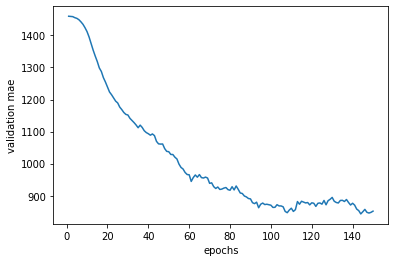

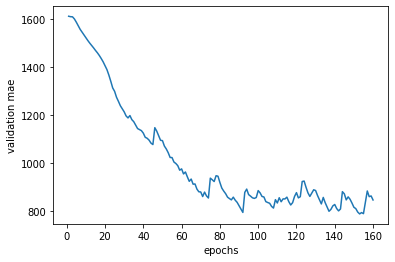

In [45]:
import matplotlib.pyplot as plt
def epochs_mae(mae):
    plt.plot(range(1,len(mae)+1),mae)
    plt.xlabel('epochs')
    plt.ylabel('validation mae')
    plt.show()
#平滑处理
smooth_points = []
factor = 0.9
for point in average_mae[10:]:
    if smooth_points:
        previous = smooth_points[-1]
        smooth_points.append(previous*factor + point*(1-factor))
    else:
        smooth_points.append(point)
epochs_mae(smooth_points)
smooth_points2 = []
last_val = all_mae_history[-1]
for point in last_val:
    if smooth_points2:
        previous = smooth_points2[-1]
        smooth_points2.append(previous*factor + point*(1-factor))
    else:
        smooth_points2.append(point)
epochs_mae(smooth_points2)

In [49]:
model.evaluate(test_data,test_label)

3416/3416 [==============================] - 0s 33us/step


[1096151.6416861827, 741.154296875]